In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x -Y "/content/drive/MyDrive/Colab Notebooks/DL_Lab.rar" "/content/drive/MyDrive/Exam_DL"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/18583.jpg_brightness_2.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/18583.jpg_rotation_2.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/186327.jpg_brightness_2.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/186327.jpg_rotation_1.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/187628.jpg_rotation_1.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/189488.jpg_rotation_1.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/189488.jpg_rotation_2.jpg      41%  OK 
Extracting  /content/drive/MyDrive/Exam_DL/Image_dataset_1/class2/189646.jpg_brightness_2.jpg      41%  OK 
Extracting  /content/driv

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 1: Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Step 2: Dataset Path
dataset_path = "/content/drive/MyDrive/Exam_DL/Image_dataset_1"

# Step 3: Data Preprocessing with resized images (32x32)
def load_and_preprocess_dataset(dataset_path, img_size=(32, 32), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        validation_split=0.2
    )

    # Training Data
    train_data = datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,  # Resize images to 32x32
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    # Validation Data
    val_data = datagen.flow_from_directory(
        dataset_path,
        target_size=img_size,  # Resize images to 32x32
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_data, val_data

# Load resized dataset (32x32)
img_size = (32, 32)  # Resize images to 32x32
batch_size = 32
train_data, val_data = load_and_preprocess_dataset(dataset_path, img_size, batch_size)




Found 5440 images belonging to 3 classes.
Found 1359 images belonging to 3 classes.


In [ ]:
# Step 4: Design CNN Model with Skip Connections
def build_cnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)

    # Adjust input channels to match x
    inputs_adjusted = layers.Conv2D(32, (1, 1), padding="same")(inputs)
    skip1 = layers.Add()([inputs_adjusted, x])  # Skip connection

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(skip1)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)

    # Adjust skip1 channels to match x
    skip1_adjusted = layers.Conv2D(64, (1, 1), padding="same")(skip1)
    skip2 = layers.Add()([skip1_adjusted, x])  # Skip connection

    # Output Block
    x = layers.GlobalAveragePooling2D()(skip2)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

num_classes = train_data.num_classes
input_shape = (img_size[0], img_size[1], 3)
model = build_cnn_model(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# Step 5: Train the Model
history = model.fit(
    train_data,  # Use train_data directly
    validation_data=val_data,  # Use val_data directly
    epochs=20,
    batch_size=batch_size
)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


170/170 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.4749 - loss: 1.0661 - val_accuracy: 0.4437 - val_loss: 1.3765
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.5403 - loss: 0.9722 - val_accuracy: 0.4511 - val_loss: 1.1224
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.5598 - loss: 0.9263 - val_accuracy: 0.4628 - val_loss: 1.1708
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.5920 - loss: 0.8815 - val_accuracy: 0.5254 - val_loss: 0.9979
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.6264 - loss: 0.8321 - val_accuracy: 0.4658 - val_loss: 1.0905
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.6629 - loss: 0.7827 - val_accuracy: 0.5923 - val_loss: 0.8884
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - accuracy: 0.6677 - loss: 0.7616 - val_accuracy: 0.6240 - val_loss: 0.8334
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 0.7038 - loss: 0.7005 - val

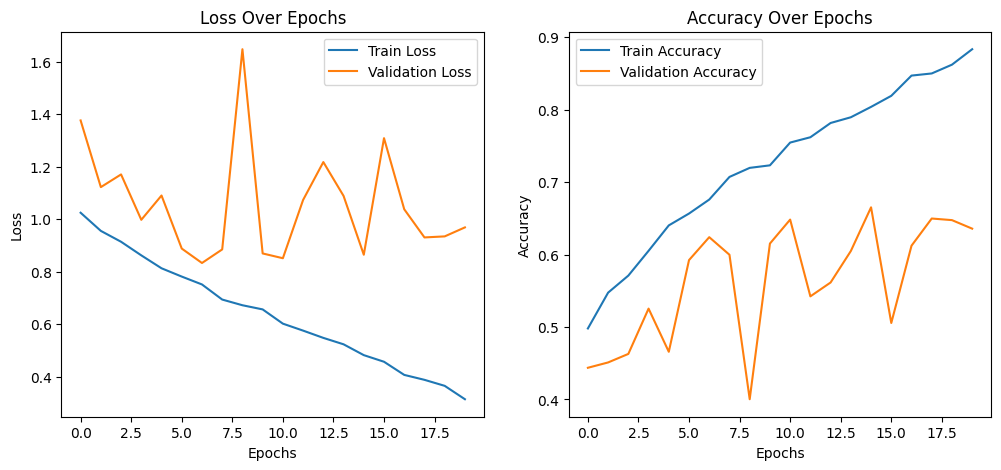

In [ ]:
# Step 6: Plot Loss and Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

plot_training_history(history)



In [ ]:
# Step 7: Evaluate Model and Report Metrics
# Predict on validation data
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = val_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
report = classification_report(y_true, y_pred_classes, target_names=[f"Class {i}" for i in range(num_classes)])
print("\nClassification Report:\n", report)


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step
Confusion Matrix:
 [[ 18 173 114]
 [ 59 316 228]
 [ 42 234 175]]

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.15      0.06      0.08       305
     Class 1       0.44      0.52      0.48       603
     Class 2       0.34      0.39      0.36       451

    accuracy                           0.37      1359
   macro avg       0.31      0.32      0.31      1359
weighted avg       0.34      0.37      0.35      1359



In [ ]:
model = build_cnn_model(input_shape=(128, 128, 3), num_classes=10)

# Print the model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 128, 128, 32)   │            896 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 128, 128, 32)   │            128 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 128, 128, 32)   │            128 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 128, 128, 32)   │            128 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 128, 128, 32)   │              0 │ conv2d_14[0][0],       │
│                           │                        │                │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 128, 128, 64)   │         18,496 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 128, 128, 64)   │            256 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 128, 128, 64)   │          2,112 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 128, 128, 64)   │            256 │ conv2d_16[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 128, 128, 64)   │              0 │ conv2d_17[0][0],       │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 64)             │              0 │ add_5[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 10)             │            650 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,226 (270.41 KB)

 Trainable params: 68,842 (268.91 KB)

 Non-trainable params: 384 (1.50 KB)